In [1]:
# Simple Linear Regression in Python

# Step 1 - Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# For Splitting the data - for instance: training (80%) and test(20%)
from sklearn.model_selection import train_test_split

# For finding the best fit line
from sklearn.linear_model import LinearRegression

# Function to evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

data = {
    "YearsExperience": [1.1, 2.0, 3.2, 4.5, 5.1, 6.8, 7.5, 8.3, 9.0, 10.5],
    "Salary": [39343, 46205, 54445, 60000, 65200, 72500, 78000, 83000, 88000, 95000]
}

# Step 2 - Load and Prepare data
df = pd.DataFrame(data)

print(f"{separator} DataFrame: {separator}")
print(df)
print(divider)
print(f"{separator} DataFrame Summary: {separator}")
print(df.info())
print()
print(df.head())
print(divider)
print(f"{separator} Missing values: {separator}")
print(df.isnull().sum())

____________________ DataFrame: ____________________
   YearsExperience  Salary
0              1.1   39343
1              2.0   46205
2              3.2   54445
3              4.5   60000
4              5.1   65200
5              6.8   72500
6              7.5   78000
7              8.3   83000
8              9.0   88000
9             10.5   95000

******************************************************************************************

____________________ DataFrame Summary: ____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  10 non-null     float64
 1   Salary           10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes
None

   YearsExperience  Salary
0              1.1   39343
1              2.0   46205
2              3.2   54445
3              4.5   60000
4              

In [3]:
# Selecting independent variable(s) - must be 2D array for scikit-learn
x = df[['YearsExperience']]

# Selecting dependent variable (target) - ID array or series
y = df['Salary']

# Step 3 - Split the dataset into training and test data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Step 4 - Create and Train Model
model = LinearRegression()
model.fit(x_train, y_train) # or LinearRegression().fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# Step 5 - Make Prediction
y_pred = model.predict(x_test)
print(f"\n>> The Predicted values: {y_pred}")
print(f">> The Actual values: {y_test.values}")


>> The Predicted values: [86624.38982045 45882.39662264]
>> The Actual values: [88000 46205]


In [6]:
# Step 6 - Evaluate the Model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

"""
    Model Evaluation Guidelines:
    
    R2 >= 0.7:
        Often considered a good fit in many practical scenarios.
        The model explains a large portion of the variance in the target variable.
    
    0.4 <= R2 < 0.7:
        Moderate fit. The model captures some meaningful patterns,
        but there is still significant unexplained variance.
        May be acceptable depending on the problem domain.
    
    R2 < 0.4:
        Poor fit. The model explains little of the variance in the data.
        This usually indicates underfitting, weak features, or that
        the relationship between variables is not well captured.
    
    Additional Notes:
    - R2 ranges from negative infinity to 1.
    - R2 = 1 indicates a perfect fit.
    - R2 = 0 means the model performs no better than predicting the mean.
    - Negative R2 means the model performs worse than predicting the mean.
    - RMSE should be as low as possible and interpreted relative
      to the scale of the target variable.
"""

print(f"\n>> The Mean Squared Error: {mse} \n>> The RMSE: {rmse} \n>> The R2 Score: {r2}\n")


>> The Mean Squared Error: 998188.152578281 
>> The RMSE: 999.0936655680892 
>> The R2 Score: 0.9977142762381227



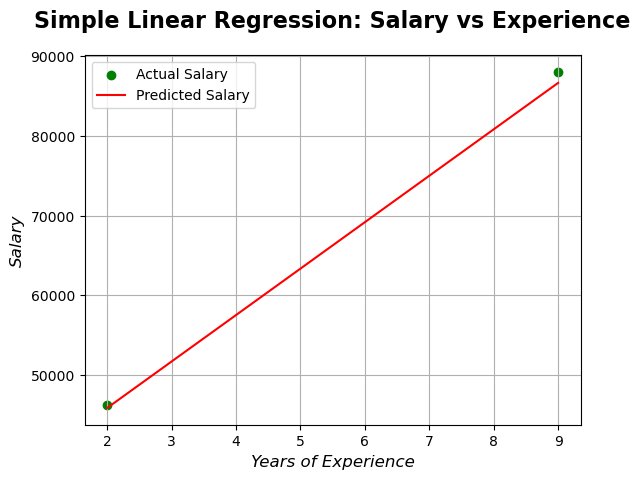

In [7]:
# Step 7 - Visualize Actual vs Predicted Results
# While plotting we plot the predicted variables and the actual ones
plt.scatter(x_test, y_test, color = 'green', label = 'Actual Salary')
plt.plot(x_test, y_pred, color = 'red', label = 'Predicted Salary')
plt.title("Simple Linear Regression: Salary vs Experience", fontweight="bold", fontsize=16, pad=20)
plt.xlabel("Years of Experience", fontstyle="italic", fontsize=12)
plt.ylabel("Salary", fontstyle="italic", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()